<a href="https://colab.research.google.com/github/dsabdulla/Aviacompaniya-reytingi/blob/main/Airline_passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

In [2]:
sample_solution = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Aviacompaniya-reytingi/main/sample_submission.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Aviacompaniya-reytingi/main/test_dataset.csv')
train_data = pd.read_csv('https://raw.githubusercontent.com/dsabdulla/Aviacompaniya-reytingi/main/train_dataset.csv')

In [3]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df = train_data.drop(columns=['id']).copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int6

In [6]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504671
Inflight entertainment               0.401109
Seat comfort                         0.342061
On-board service                     0.327361
Leg room service                     0.325405
Cleanliness                          0.310046
Flight Distance                      0.298484
Inflight wifi service                0.277497
Baggage handling                     0.248839
Inflight service                     0.240580
Checkin service                      0.232337
Food and drink                       0.206881
Ease of Online booking               0.164025
Age                                  0.145327
Departure/Arrival time convenient    0.067758
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.043456
Gate location                        0.007422
dtype: float64

In [9]:
encoded = pd.get_dummies(df)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
1,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
2,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
3,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
4,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


####ML preparation

In [29]:
X = encoded.drop('satisfaction', axis=1).values
y = encoded['satisfaction']

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

#####LogisticRegression

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       998
           1       0.85      0.86      0.86       997

    accuracy                           0.86      1995
   macro avg       0.86      0.86      0.86      1995
weighted avg       0.86      0.86      0.86      1995

Model aniqligi: 0.8551378446115289


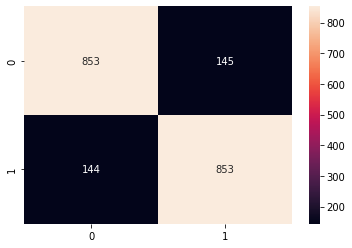

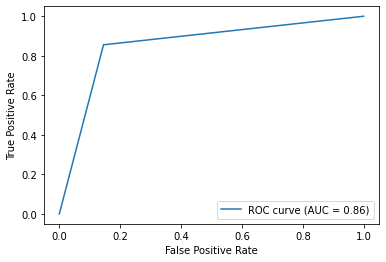

In [ ]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#####Support Vector Machines

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       998
           1       0.94      0.92      0.93       997

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995

Model aniqligi: 0.9278195488721804


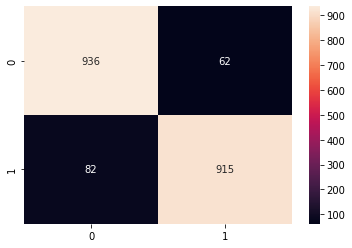

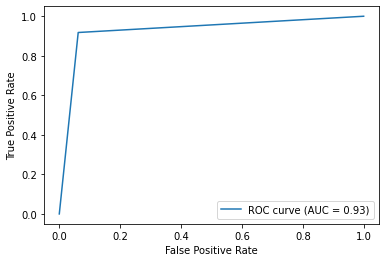

In [ ]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#####Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       998
           1       0.94      0.91      0.93       997

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995

Model aniqligi: 0.9298245614035088


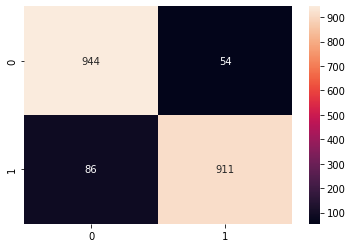

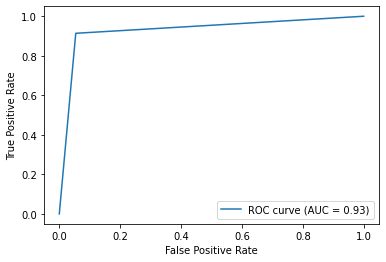

In [ ]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier(max_depth=10)
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

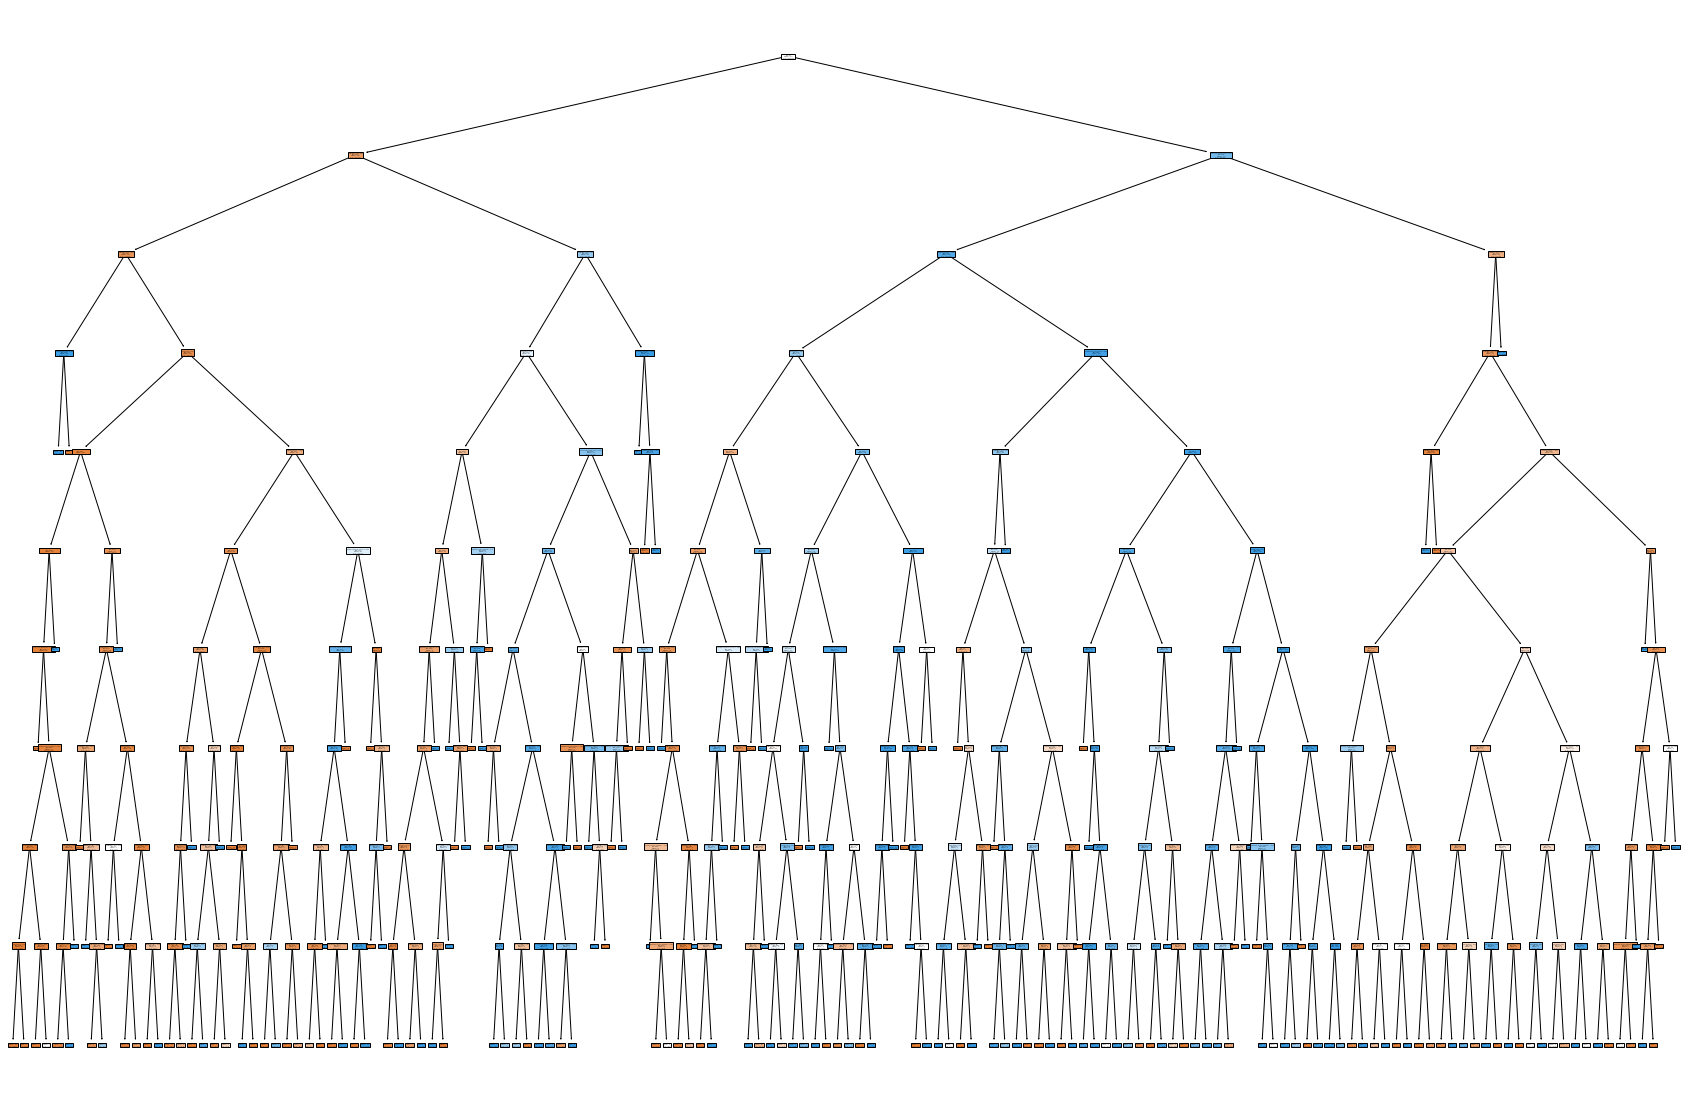

In [ ]:
cols = encoded.drop('satisfaction', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 25)}

tree_gscv = GridSearchCV(tree_model, param_grid, cv=5)

tree_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
tree_gscv.best_params_

{'max_depth': 11}

#####Random Forest

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       998
           1       0.94      0.93      0.93       997

    accuracy                           0.93      1995
   macro avg       0.93      0.93      0.93      1995
weighted avg       0.93      0.93      0.93      1995

Model aniqligi: 0.9333333333333333


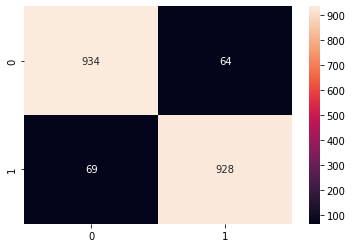

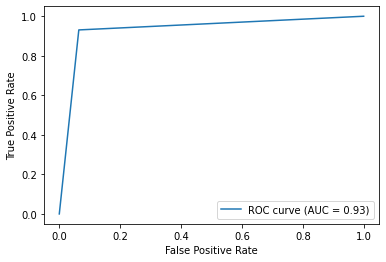

In [ ]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#####XGBoost

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       998
           1       0.96      0.95      0.96       997

    accuracy                           0.96      1995
   macro avg       0.96      0.96      0.96      1995
weighted avg       0.96      0.96      0.96      1995

Model aniqligi: 0.9553884711779449


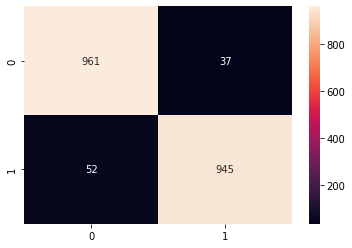

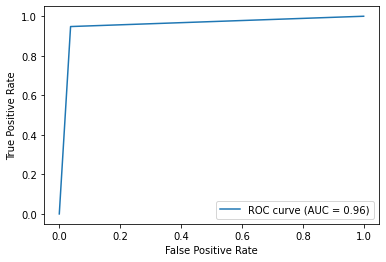

In [ ]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

####Model pipeline

In [32]:
# machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(SVC())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(XGBClassifier())
model_pipeline.append(GaussianNB())

In [33]:
# ML training and predicting
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGB', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = roc_curve(y_test, y_pred)
    auc_list.append(round(auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))


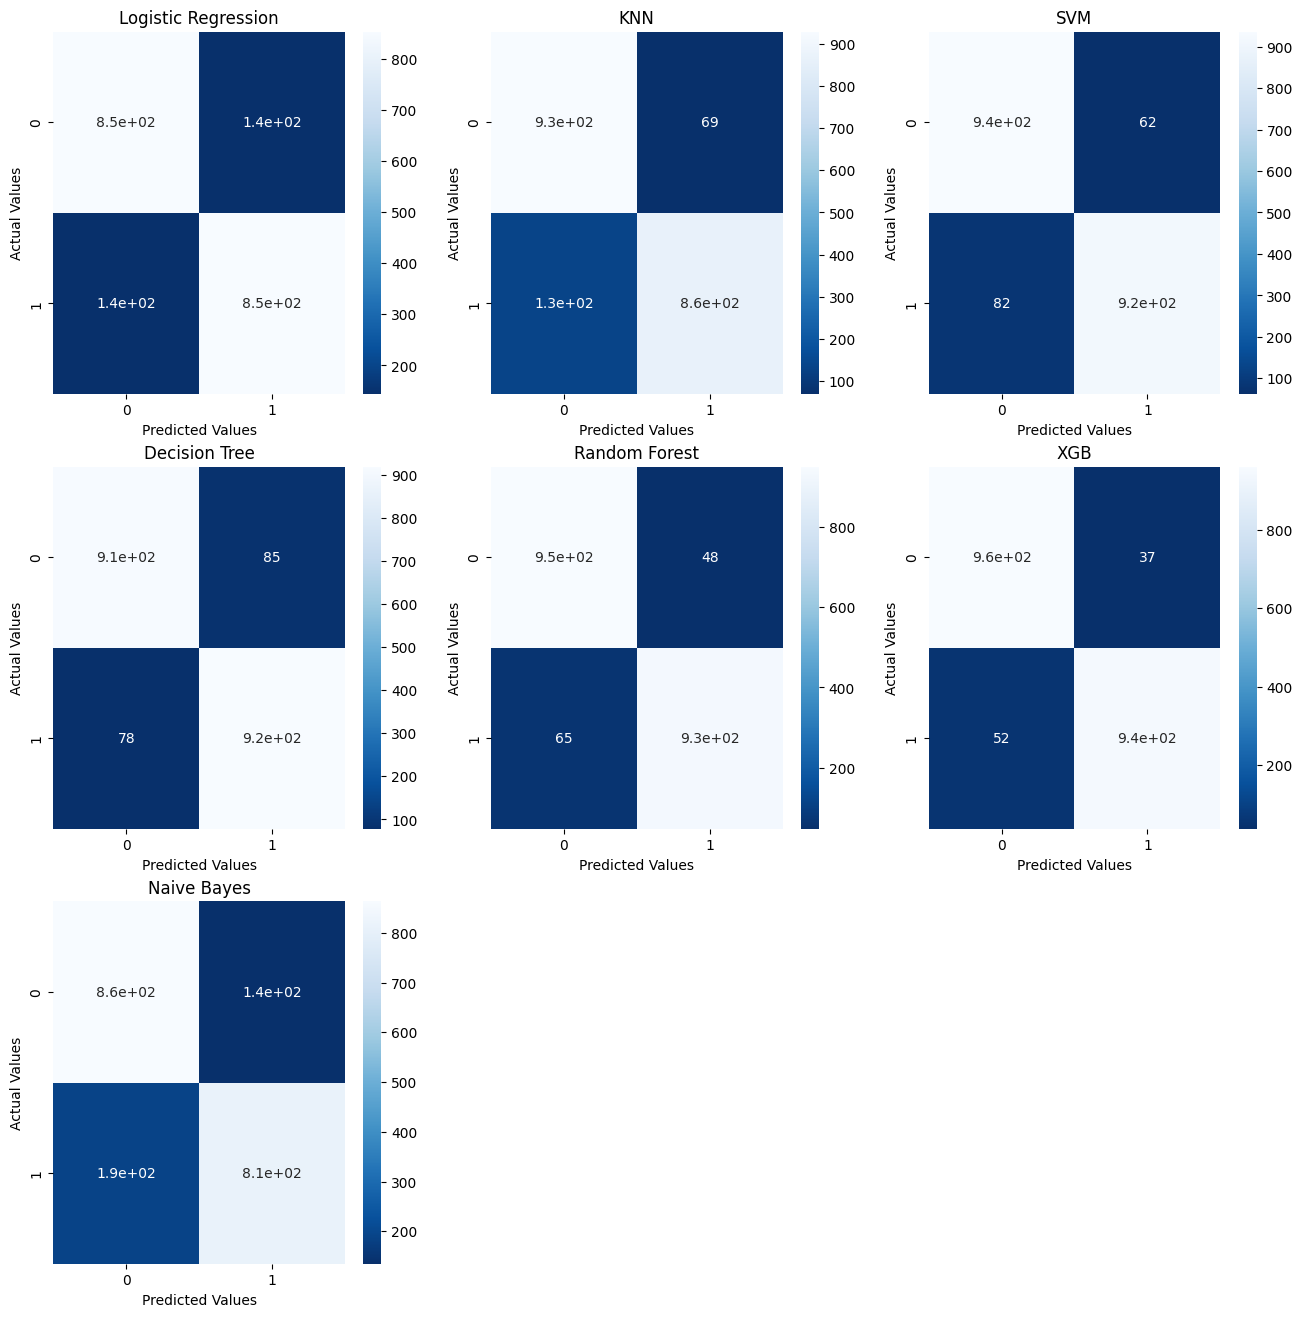

In [34]:
# Plot confusion matrix
fig = plt.figure(figsize = (16,16))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [35]:
# Accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy':acc_list, 'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.855138,0.86
1,KNN,0.898747,0.90
2,SVM,0.927820,0.93
3,Decision Tree,0.918296,0.92
4,Random Forest,0.943358,0.94
5,XGB,0.955388,0.96
6,Naive Bayes,0.838095,0.84


####FULL PIPELINE

In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=33)

In [37]:
cat_cols = ['Gender','Customer Type','Type of Travel','Class']
num_cols = ['Age', 'Flight Distance', 'Inflight wifi service',
            'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service',
            'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [39]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(sparse=False), cat_cols)
])

In [40]:
X = train_set.drop('satisfaction', axis=1)
y = train_set['satisfaction'].copy()
y_test = test_set['satisfaction'].copy()

In [41]:
X_prepared = full_pipeline.fit_transform(X)
X_test_prepared = full_pipeline.fit_transform(test_set)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# XGBoost
XGB_model = XGBClassifier()
XGB_model.fit(X_prepared, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
test_prepared = full_pipeline.fit_transform(test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
test_RF_pred = XGB_model.predict(test_prepared)

In [46]:
sample_solution.satisfaction = test_RF_pred
sample_solution.to_csv("Airline_passenger_satisfaction.csv", index=False)
sample_solution

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
